# HM1: Logistic Regression.

### Name: Christian Bautista


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [21]:
# Load Packages
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
from numpy import linalg

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [22]:
data = pd.read_csv("./data.csv")
display(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## 1.2 Examine and clean data

In [23]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

data = data.drop(columns=['id','Unnamed: 32'])
def modDiagnosis(x):
    if x=='B':
        return 1
    elif x=='M':
        return -1
    else:
        return x
data['diagnosis'] = data['diagnosis'].apply(modDiagnosis)
display(data)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [24]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
y = data['diagnosis'].to_numpy()
x = data.drop(columns='diagnosis').to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print("Original Shape: ",data.shape)
print("Input Training Shape: ",x_train.shape)
print("Output Training Shape: ",y_train.shape)
print("Input Testing Shape: ",x_test.shape)
print("Output Testing Shape: ",y_test.shape)

Original Shape:  (569, 31)
Input Training Shape:  (455, 30)
Output Training Shape:  (455,)
Input Testing Shape:  (114, 30)
Output Testing Shape:  (114,)


## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [25]:
# Standardization

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[-0.05536291  0.00136489 -0.05431514 -0.0570866  -0.11460356 -0.02769166
 -0.05251674 -0.06917466 -0.01998588 -0.05334019 -0.03955586  0.12636415
 -0.02188444 -0.0463274   0.04603825  0.04304525 -0.04257918 -0.02085668
  0.20802483 -0.03005862 -0.06814607  0.01641286 -0.06121343 -0.05884784
 -0.07662369 -0.04906964 -0.08229553 -0.10511583 -0.00620975 -0.10774898]
test std = 
[0.95522453 0.94912308 0.95804691 0.93134423 1.08775129 1.12589852
 1.0120803  0.99315792 1.2081299  1.01875435 0.82016937 0.99410342
 0.83404494 0.75853384 0.97041774 1.237121   0.81949489 0.98020379
 1.42342104 0.79542152 0.98191727 0.97881052 0.98770396 0.99728879
 1.08905989 1.18082636 1.11500518 1.01261699 1.24424899 1.05391304]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [26]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)

def objective(w, x, y, lam):
    n,d = x.shape
    sum = 0
    for i in range(n):
        innerproduct = numpy.dot(y[i]*numpy.transpose(x[i]),w)
        logpart = numpy.log(1+numpy.exp(-innerproduct))
        normpart = (lam/2)*(linalg.norm(w)**2)
        sum += logpart+normpart
    return (1/n)*sum

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [27]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n,d = x.shape  
    sum = 0
    for i in range(n):
        numerator = y[i]*x[i]
        innerproduct = numpy.dot(y[i]*numpy.transpose(x[i]),w)
        denominator = 1+numpy.exp(innerproduct)
        sum += (numerator/denominator) + (lam*w)
    return (-1/n)*sum

In [28]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    n,d = x.shape
    objvals = numpy.zeros(max_epoch) 
    if w is None:
        w = numpy.zeros(d) 
        
    for t in range(max_epoch):
        objval = objective(w, x, y, lam)
        objvals[t] = objval
        print(str(t)+": "+str(objval))
        g = gradient(w, x, y, lam)
        w -= (learning_rate*g)
        
    return w, objvals

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [29]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_gd,objvals_gd = gradient_descent(x_train,y_train,0,1,None)

0: 0.6931471805599468
1: 0.1816560964371292
2: 0.1427237517522359
3: 0.1275113553874095
4: 0.12057761415454384
5: 0.11574985240002088
6: 0.11186538781499301
7: 0.10858624137343656
8: 0.10575184385705245
9: 0.10326415424404205
10: 0.10105555461097852
11: 0.09907637840848409
12: 0.09728877491191042
13: 0.09566317830856286
14: 0.09417606575886162
15: 0.09280844325082915
16: 0.09154478055189837
17: 0.09037224022911679
18: 0.08928010726486248
19: 0.08825935962950546
20: 0.08730234018654774
21: 0.08640250279734847
22: 0.08555421360477394
23: 0.0847525939050903
24: 0.08399339473987584
25: 0.08327289594203709
26: 0.08258782421959178
27: 0.08193528619446522
28: 0.08131271328742054
29: 0.08071781605960698
30: 0.08014854615818731
31: 0.07960306441817203
32: 0.07907971398031635
33: 0.07857699752085626
34: 0.07809355787117694
35: 0.07762816144740917
36: 0.07717968402117086
37: 0.07674709845041225
38: 0.07632946405897192
39: 0.07592591740906009
40: 0.07553566425553557
41: 0.07515797250688847
42: 0.0

In [30]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_gd_reg,objvals_gd_reg = gradient_descent(x_train,y_train,1E-3,1,None)

0: 0.6931471805599468
1: 0.18261968487841387
2: 0.14370009197583267
3: 0.12848251905880229
4: 0.12157098261794819
5: 0.11678155281072468
6: 0.11294242998726849
7: 0.1097121073285844
8: 0.10692829792677096
9: 0.10449203214588534
10: 0.10233515873830092
11: 0.10040769185232555
12: 0.09867158409487768
13: 0.0970971465759278
14: 0.09566077928153927
15: 0.0943434405941457
16: 0.09312957222754281
17: 0.09200632189094597
18: 0.09096296874902798
19: 0.08999049120629116
20: 0.08908123689947989
21: 0.08822866746552242
22: 0.08742715887647738
23: 0.08667184362985211
24: 0.08595848484630224
25: 0.08528337495501484
26: 0.08464325351344618
27: 0.0840352400527589
28: 0.08345677882163607
29: 0.0829055930256538
30: 0.08237964669992733
31: 0.08187711275997041
32: 0.0813963460852374
33: 0.08093586072708331
34: 0.0804943105161613
35: 0.08007047248691168
36: 0.07966323264856558
37: 0.07927157372023888
38: 0.07889456451766207
39: 0.07853135073493656
40: 0.07818114690955262
41: 0.07784322939508817
42: 0.0775

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [31]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    numerator = -yi*xi
    innerproduct = numpy.dot(yi*numpy.transpose(xi),w)
    denominator = 1+numpy.exp(innerproduct)
    logpart = numpy.log(1+numpy.exp(-innerproduct))
    normpart = (lam/2)*(linalg.norm(w)**2)
    g = (numerator/denominator) + (lam*w)
    obj = logpart+normpart
    return obj,g

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [32]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n,d = x.shape
    objvals = numpy.zeros(max_epoch)
    if w is None:
        w = numpy.zeros(d)

    for t in range(max_epoch):
        rand_indices = numpy.random.permutation(n)
        x_rand = x[rand_indices]
        y_rand = y[rand_indices]
        objval = 0

        for i in range(n):
            xi = x_rand[i]
            yi = y_rand[i]
            obj,g = stochastic_objective_gradient(w, xi, yi, lam)
            objval += obj
            # objval = obj
            w -= (learning_rate*g)
            # for j in range(d-1):
            #     w[j+1] = w[j]-(learning_rate*g[j])

        objval /= n
        objvals[t] = objval
        print(str(t)+": "+str(objval))
        # learning_rate*=.9

    return w, objvals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [33]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_sgd,objvals_sgd = sgd(x_train,y_train,0,1,None)

0: 0.27231714647546434
1: 0.44201847596317
2: 0.39744064464717244
3: 0.45424781997283376
4: 0.33706405628866415
5: 0.31452611905595723
6: 0.22809881942380505
7: 0.35946647937649645
8: 0.29393247726097804
9: 0.2574702415876981
10: 0.3039458666724603
11: 0.24344259255740514
12: 0.21122437523826057
13: 0.3390846949155613
14: 0.2506224960196384
15: 0.18582202697568637
16: 0.17587692087487253
17: 0.1619474923377069
18: 0.194584114646831
19: 0.2553674059517392
20: 0.353923776643572
21: 0.2003286710204954
22: 0.1958184087858527
23: 0.16946649491326862
24: 0.2685791145071976
25: 0.2028526507124045
26: 0.32230251136155236
27: 0.32756847781659937
28: 0.21653032000768668
29: 0.19532916225466587
30: 0.20510824387798468
31: 0.19792765476856033
32: 0.1773483665040033
33: 0.19554449095055024
34: 0.32115149405182236
35: 0.3364041036966144
36: 0.20071819610154407
37: 0.1937025485886955
38: 0.24744780660932747
39: 0.21029270967958305
40: 0.20000651936459438
41: 0.3161270942576889
42: 0.1709454223296258


In [34]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_sgd_reg,objvals_sgd_reg = sgd(x_train,y_train,1E-3,1,None)

0: 0.6838765680476026
1: 0.619966844378524
2: 0.36886666571704685
3: 0.4669308723760206
4: 0.6147304883629386
5: 0.4579930231099857
6: 0.432228649308341
7: 0.5106928530691915
8: 0.6366372836821541
9: 0.36209776337580424
10: 0.1774186976310755
11: 0.3812213281951602
12: 0.3294631625980738
13: 0.23191441284261444
14: 0.6804547340163127
15: 0.45887904587872264
16: 0.6604771111239678
17: 0.3858275168884064
18: 0.2993956192337001
19: 0.29837826174482734
20: 0.5754749400465724
21: 0.4454452073654004
22: 0.42711617881073977
23: 0.6069441355612153
24: 0.47654063659951856
25: 0.4889302990309202
26: 0.3307523554306926
27: 0.4902662324873171
28: 0.2560677449910021
29: 0.4667886670179426
30: 0.32688319604494553
31: 0.6487476877452025
32: 0.723525125408606
33: 0.4896444077223802
34: 0.45121037620364896
35: 0.42348426320621185
36: 0.5634171412644211
37: 0.5784710577600113
38: 0.4539794310295924
39: 0.4749633273420008
40: 0.33237914341328073
41: 0.6561435049392829
42: 0.4176624288578728
43: 0.6510276

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [35]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: b-by-d matrix
#     yi: label: b-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    b,d = xi.shape
    sum_obj = 0
    sum_g = 0
    for i in range(b):
        numerator = -yi[i]*xi[i]
        innerproduct = numpy.dot(yi[i]*numpy.transpose(xi[i]),w)
        denominator = 1+numpy.exp(innerproduct)
        logpart = numpy.log(1+numpy.exp(-innerproduct))
        normpart = (lam/2)*(linalg.norm(w)**2)
        sum_obj += logpart+normpart
        sum_g += ((numerator/denominator)+(lam*w))
    obj = sum_obj/b
    g = sum_g/b
    return obj,g

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [36]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     b: batch_size: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, b, w, max_epoch=100):
    n,d = x.shape
    objvals = numpy.zeros(max_epoch)
    if w is None:
        w = numpy.zeros(d)
    
    for t in range(max_epoch):
        rand_indices = numpy.random.permutation(n)
        x_rand = x[rand_indices]
        y_rand = y[rand_indices]
        objval = 0
        count = 0
        i = 0

        while i<n:
            xi = []
            yi = []
            if (i+b)>n:
                xi = x_rand[i:]
                yi = y_rand[i:]
                i=n
            else:
                xi = x_rand[i:(i+b)]
                yi = y_rand[i:(i+b)]
                i+=b
            obj,g = mb_objective_gradient(w,xi,yi,lam)
            objval += obj
            # objval = obj
            # for j in range(d-1):
            #     w[j+1] = w[j]-(learning_rate*g[j])
            w -= (learning_rate*g)
            count+=1

        objval/=count
        objvals[t] = objval
        print(str(t)+": "+str(objval))
        # learning_rate*=.9
      
    return w,objvals

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [37]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_mbgd,objvals_mbgd = mbgd(x_train,y_train,0,1,5,None)

0: 0.13653462540036954
1: 0.10247041762905737
2: 0.07805660663919743
3: 0.09335354808122642
4: 0.0815158981308097
5: 0.06636308981146447
6: 0.06643148116903602
7: 0.08470525091369623
8: 0.07476119087613725
9: 0.0689807162950102
10: 0.0629113446555109
11: 0.07195311115961826
12: 0.07752266437880051
13: 0.06141948174930883
14: 0.06004821880526556
15: 0.05958383731028593
16: 0.08349434225685394
17: 0.0772063830590084
18: 0.05673547050102102
19: 0.057997349768000805
20: 0.0776914927338067
21: 0.05658375370952729
22: 0.05643480089990006
23: 0.06029044100257942
24: 0.05480397883539817
25: 0.05786662414256489
26: 0.07822674402058806
27: 0.06966583380867968
28: 0.061716882157347136
29: 0.05555506653486281
30: 0.06044744220377146
31: 0.06653187648672654
32: 0.05832912458301698
33: 0.05504944392243969
34: 0.05549390463120071
35: 0.05992139981579992
36: 0.05518590521375047
37: 0.05527455394225202
38: 0.060707576372612836
39: 0.055095512001335445
40: 0.057921857742961914
41: 0.05429251249489975
42

In [38]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_mbgd_reg,objvals_mbgd_reg = mbgd(x_train,y_train,1E-3,1,5,None)

0: 0.10638856086348403
1: 0.09087478815156563
2: 0.10113668048725567
3: 0.11393403442953233
4: 0.11344641895042878
5: 0.11398683435690593
6: 0.1029580518844983
7: 0.09398923375459649
8: 0.09023929237693926
9: 0.08876917782116034
10: 0.07995246726353773
11: 0.11752023277589344
12: 0.10579773278150359
13: 0.10778516175196148
14: 0.07930885261454054
15: 0.0946550965731325
16: 0.0845590834029573
17: 0.08409153748050109
18: 0.08186011176414944
19: 0.08179338750369973
20: 0.08266997666645715
21: 0.10844510613516793
22: 0.0858120942889271
23: 0.08319346538910952
24: 0.097730499071771
25: 0.09619469865699502
26: 0.0793378557191816
27: 0.07595777537224006
28: 0.0925294945961215
29: 0.07841288443127037
30: 0.0924193082341071
31: 0.09188714765214913
32: 0.07768297438447096
33: 0.07525672291321445
34: 0.09680541195964233
35: 0.12492999987258883
36: 0.10251433398423751
37: 0.08258454995213318
38: 0.12538263331194102
39: 0.08481511010877121
40: 0.09774591032698894
41: 0.08575134082430501
42: 0.11136

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

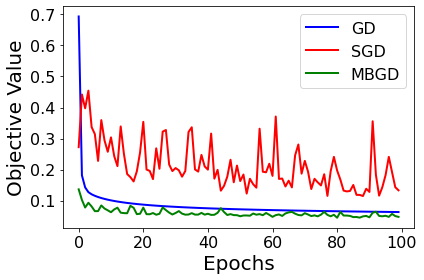

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

e_gd = range(len(objvals_gd))
e_sgd = range(len(objvals_sgd))
e_mbgd = range(len(objvals_mbgd))

l_gd, = plt.plot(e_gd, objvals_gd, '-b', linewidth=2)
l_sgd, = plt.plot(e_sgd, objvals_sgd, '-r', linewidth=2)
l_mbgd, = plt.plot(e_mbgd, objvals_mbgd,'-g', linewidth=2)

plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Objective Value', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend([l_gd, l_sgd, l_mbgd], ['GD', 'SGD','MBGD'], fontsize=16)
plt.tight_layout()
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [41]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    f = numpy.sign(numpy.dot(X,w))
    return f

In [42]:
# evaluate training error of logistric regression and regularized version
f_gd = predict(w_gd,x_train) 
gd_error = numpy.mean(numpy.abs(f_gd-y_train)/2)
print("GD Error: "+str(gd_error))
f_gd_reg = predict(w_gd_reg,x_train)
gd_reg_error = numpy.mean(numpy.abs(f_gd_reg-y_train)/2)
print("GD Reg Error: "+str(gd_reg_error))
f_sgd = predict(w_sgd,x_train) 
sgd_error = numpy.mean(numpy.abs(f_sgd-y_train)/2)
print("SGD Error: "+str(sgd_error))
f_sgd_reg = predict(w_sgd_reg,x_train)
sgd_reg_error = numpy.mean(numpy.abs(f_sgd_reg-y_train)/2)
print("SGD Reg Error: "+str(sgd_reg_error))
f_mbgd = predict(w_mbgd,x_train) 
mbgd_error = numpy.mean(numpy.abs(f_mbgd-y_train)/2)
print("MBGD Error: "+str(mbgd_error))
f_mbgd_reg = predict(w_mbgd_reg,x_train)
mbgd_reg_error = numpy.mean(numpy.abs(f_mbgd_reg-y_train)/2)
print("MBGD Reg Error: "+str(mbgd_reg_error))

GD Error: 0.015384615384615385
GD Reg Error: 0.015384615384615385
SGD Error: 0.03956043956043956
SGD Reg Error: 0.026373626373626374
MBGD Error: 0.01098901098901099
MBGD Reg Error: 0.015384615384615385


In [43]:
# evaluate testing error of logistric regression and regularized version
f_gd = predict(w_gd,x_test) 
gd_error = numpy.mean(numpy.abs(f_gd-y_test)/2)
print("GD Error: "+str(gd_error))
f_gd_reg = predict(w_gd_reg,x_test)
gd_reg_error = numpy.mean(numpy.abs(f_gd_reg-y_test)/2)
print("GD Reg Error: "+str(gd_reg_error))
f_sgd = predict(w_sgd,x_test) 
sgd_error = numpy.mean(numpy.abs(f_sgd-y_test)/2)
print("SGD Error: "+str(sgd_error))
f_sgd_reg = predict(w_sgd_reg,x_test)
sgd_reg_error = numpy.mean(numpy.abs(f_sgd_reg-y_test)/2)
print("SGD Reg Error: "+str(sgd_reg_error))
f_mbgd = predict(w_mbgd,x_test) 
mbgd_error = numpy.mean(numpy.abs(f_mbgd-y_test)/2)
print("MBGD Error: "+str(mbgd_error))
f_mbgd_reg = predict(w_mbgd_reg,x_test)
mbgd_reg_error = numpy.mean(numpy.abs(f_mbgd_reg-y_test)/2)
print("MBGD Reg Error: "+str(mbgd_reg_error))

GD Error: 0.017543859649122806
GD Reg Error: 0.017543859649122806
SGD Error: 0.08771929824561403
SGD Reg Error: 0.02631578947368421
MBGD Error: 0.03508771929824561
MBGD Reg Error: 0.02631578947368421


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [44]:
print("Gradient Descent:")
print("GD Low:")
w_gd_low,obj_gd_low = gradient_descent(x_train,y_train,0,.5,None)
print("GD High:")
w_gd_high,obj_gd_high = gradient_descent(x_train,y_train,0,2,None)
print("GD Reg Low:")
w_gd_reg_low,obj_gd_reg_low = gradient_descent(x_train,y_train,1E-2,1,None)
print("GD Reg High:")
w_gd_reg_high,obj_gd_reg_high = gradient_descent(x_train,y_train,1E-5,1,None)

print("Stochastic Gradient Descent:")
print("SGD Low:")
w_sgd_low,obj_sgd_low = sgd(x_train,y_train,0,.5,None)
print("SGD High:")
w_sgd_high,obj_sgd_high = sgd(x_train,y_train,0,2,None)
print("SGD Reg Low:")
w_sgd_reg_low,obj_sgd_reg_low = sgd(x_train,y_train,1E-2,1,None)
print("SGD Reg High:")
w_sgd_reg_high,obj_sgd_reg_high = sgd(x_train,y_train,1E-5,1,None)

print("Mini Batch Gradient Descent:")
print("MBGD Low:")
w_mbgd_low,obj_mbgd_low = mbgd(x_train,y_train,0,.5,5,None)
print("MBGD High:")
w_mbgd_high,obj_mbgd_high = mbgd(x_train,y_train,0,2,5,None)
print("MBGD Reg Low:")
w_mbgd_reg_low,obj_mbgd_reg_low = mbgd(x_train,y_train,1E-2,1,5,None)
print("MBGD Reg High:")
w_mbgd_reg_high,obj_mbgd_reg_high = mbgd(x_train,y_train,1E-5,1,5,None)

Gradient Descent:
GD Low:
0: 0.6931471805599468
1: 0.24777612030245974
2: 0.21221119185730614
3: 0.1901794801970291
4: 0.1750004922757288
5: 0.16377277554160644
6: 0.15503261007326238
7: 0.14797256240819442
8: 0.14211105215120584
9: 0.1371410532753878
10: 0.1328560937882527
11: 0.12911132711109483
12: 0.1258016277941196
13: 0.12284854452656091
14: 0.120192154271497
15: 0.11778577365928182
16: 0.11559241068652645
17: 0.11358231637292943
18: 0.11173125398953639
19: 0.11001924938913465
20: 0.10842967170750233
21: 0.10694854577404803
22: 0.10556403012186295
23: 0.1042660153644021
24: 0.10304581140478741
25: 0.10189590111842277
26: 0.10080974440915566
27: 0.09978162088239319
28: 0.09880650243879101
29: 0.09787994927901421
30: 0.09699802439332891
31: 0.09615722276988574
32: 0.09535441241515993
33: 0.09458678492357923
34: 0.0938518138199094
35: 0.09314721926911469
36: 0.09247093803397036
37: 0.09182109778215464
38: 0.09119599501758474
39: 0.0905940760469276
40: 0.0900139205000786
41: 0.089454

44: 0.07412010331933164
45: 0.07378670863107543
46: 0.073462951721705
47: 0.07314836634400776
48: 0.07284251759066726
49: 0.07254499921093892
50: 0.0722554312048559
51: 0.07197345766152195
52: 0.07169874481261863
53: 0.07143097927613704
54: 0.07116986646863992
55: 0.07091512916717704
56: 0.07066650620437775
57: 0.07042375128231457
58: 0.0701866318925011
59: 0.06995492833092293
60: 0.06972843279832183
61: 0.0695069485771
62: 0.0692902892772122
63: 0.06907827814427348
64: 0.06887074742387721
65: 0.06866753777677441
66: 0.06846849774014688
67: 0.06827348323071981
68: 0.06808235708590599
69: 0.06789498863956907
70: 0.0677112533293456
71: 0.06753103233277329
72: 0.06735421222974702
73: 0.0671806846890697
74: 0.06701034617707985
75: 0.06684309768653204
76: 0.06667884448407968
77: 0.06651749587486094
78: 0.06635896498282975
79: 0.06620316854559516
80: 0.06605002672264525
81: 0.06589946291592953
82: 0.06575140360186642
83: 0.06560577817391922
84: 0.06546251879496312
85: 0.0653215602587255
86: 

C:\Users\chris\AppData\Local\Temp\ipykernel_1896\4766473.py:14: RuntimeWarning: overflow encountered in exp
  denominator = 1+numpy.exp(innerproduct)


4: 0.7777650339033636
5: 0.518292601380117
6: 0.6984435473606473
7: 0.28893895786580753
8: 0.2994656964774918
9: 0.38058784904857806
10: 0.3581953578132904
11: 0.6080755397252429
12: 0.41604848031724295
13: 0.42153994372831144
14: 0.42038520958244846
15: 0.30160128501959244
16: 0.40298522836255307
17: 0.5517057779152572
18: 0.6111371938966658
19: 0.4588096443220545
20: 0.46748278739886556
21: 0.4507507358660054
22: 0.7223226708372184
23: 0.4129295261723573
24: 0.4568969484350167
25: 0.44545159741975177
26: 0.7340612912291086
27: 0.46335858850491335
28: 0.3785373696077024
29: 0.34203328099715835
30: 0.3485310435147717
31: 0.5461409524353095
32: 0.39230962886889265
33: 0.27250956649442926
34: 0.3722685025913496
35: 0.3828624818464857
36: 0.2926327921548107
37: 0.6141584738397593
38: 0.2943413063313841
39: 0.23005381840151784
40: 0.5272466595296463
41: 0.3554660366095594
42: 0.25438886659784116
43: 0.32954095537910955
44: 0.4601063888769243
45: 0.5862435641853287
46: 0.388635619737888
47:

54: 0.04970615757450171
55: 0.050926648613685316
56: 0.048813101652176456
57: 0.04924068540675733
58: 0.048535098481289424
59: 0.047793329067881515
60: 0.04737731442350183
61: 0.04778078950268336
62: 0.048768624914687614
63: 0.0507419414983769
64: 0.05031024058963816
65: 0.04886039311849885
66: 0.04878727247279865
67: 0.04815279900839393
68: 0.04641843548512054
69: 0.04798040734424493
70: 0.04774362884655795
71: 0.04616281442171634
72: 0.047888529551117234
73: 0.04696503010277427
74: 0.04722877061042787
75: 0.045637386045518855
76: 0.05053661507436794
77: 0.04979514672037391
78: 0.04729406321459381
79: 0.04813218422900313
80: 0.04747225845383364
81: 0.04524356103460408
82: 0.04703128307877201
83: 0.04711332124488516
84: 0.046069814925067766
85: 0.046651138976949405
86: 0.04643681617685324
87: 0.04500063637790598
88: 0.04731403092630021
89: 0.04692867646111637
90: 0.04523016522463367
91: 0.04258639772590615
92: 0.04612750916224267
93: 0.04629097119172293
94: 0.045720885218051524
95: 0.0

99: 0.063170921201504
